In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("train.csv")
dataset.head(10)

In [ ]:
dataset.shape

In [ ]:
dataset.describe()

In [ ]:
dataset_with_null = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]
for features in dataset_with_null:
    print(features , np.round(dataset[features].isnull().mean() , 4) , '% missing value')

In [ ]:
dataset.head(5)

In [ ]:
for features in  dataset_with_null:
   data = dataset.copy()

   data[features] = np.where(data[features].isnull() , 1 , 0)

   data.groupby(features)['SalePrice'].median().plot.bar()
   plt.title(features)
   plt.show()


In [ ]:
print('id of the houses {} '. format(len(dataset.Id)))

In [32]:
dataset_with_object = [features for features in dataset.columns if dataset[features].dtype == 'O']
print('the len of the features with the objects {}'.format(len(dataset_with_null)))

the len of the features with the objects 18


In [33]:
dataset[dataset_with_object].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
dataset_with_numerical = [features for features in dataset.columns if dataset[features].dtype != 'O']
print("len of the numercial values {}" .format(len(dataset_with_numerical)))

In [34]:
dataset[dataset_with_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [36]:
year_feature = [features for features in dataset_with_numerical if 'Yr' in features or 'Year' in features]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [38]:
for features in year_feature:
    print(features , dataset[features].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House price vs Year Sold')

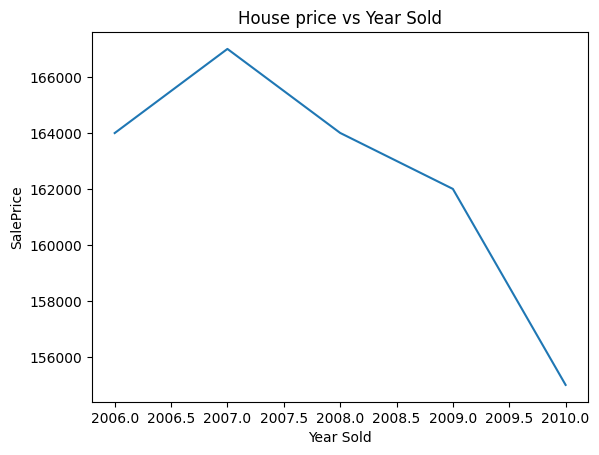

In [43]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.title('House price vs Year Sold')


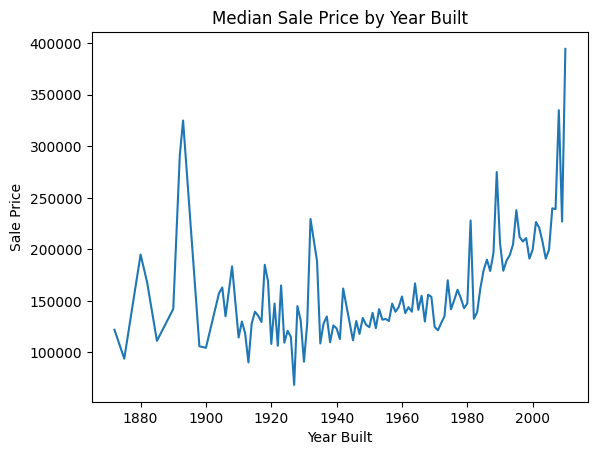

In [45]:
dataset.groupby('YearBuilt')['SalePrice'].median().plot()
plt.title('Median Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

In [46]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
dataset['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

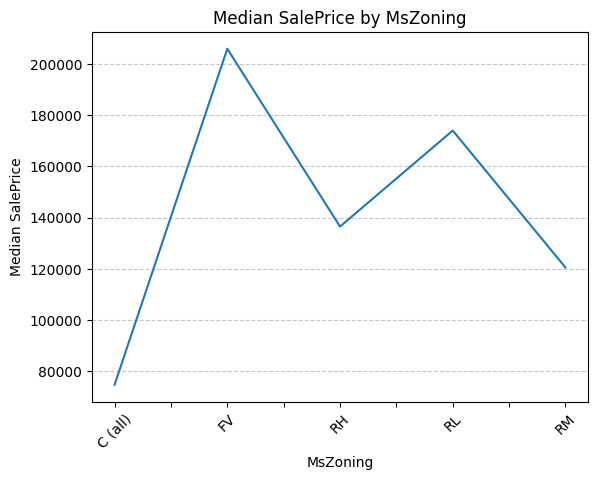

In [53]:
import matplotlib.pyplot as plt

# Group by 'MsZoning', calculate the median SalePrice, and plot
dataset.groupby('MSZoning')['SalePrice'].median().plot()

# Add labels and a title
plt.title('Median SalePrice by MsZoning')
plt.xlabel('MsZoning')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: xlabel='Id'>

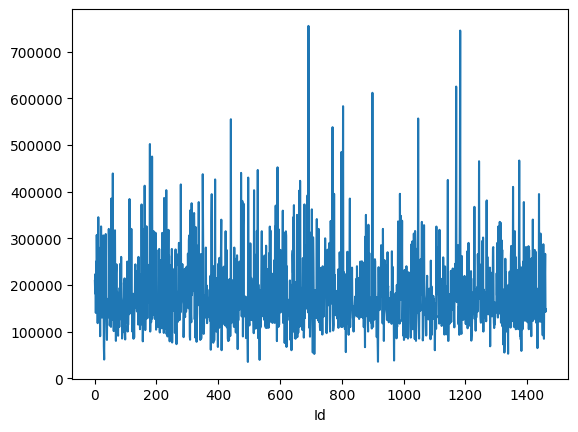

In [58]:
dataset.groupby('Id')['SalePrice'].median().plot()

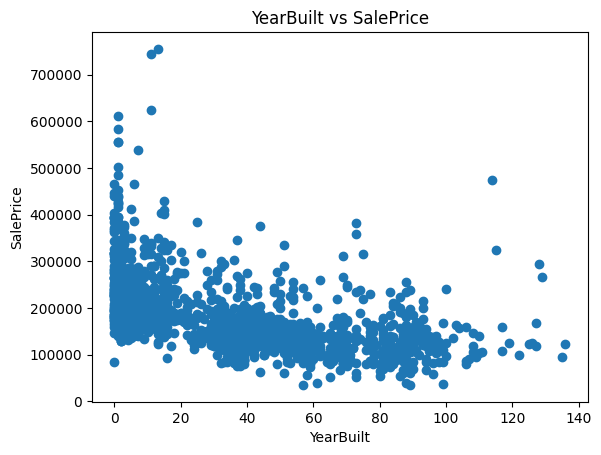

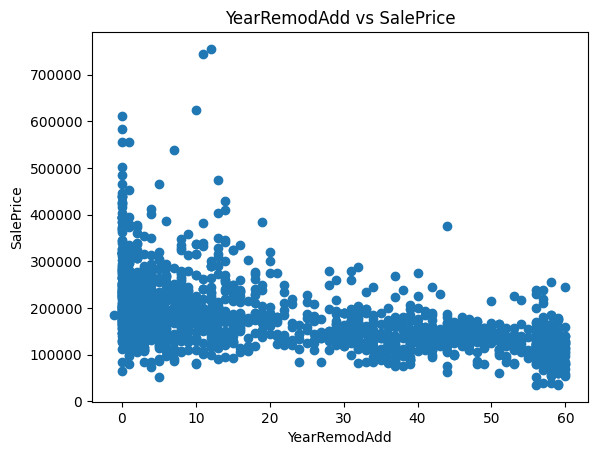

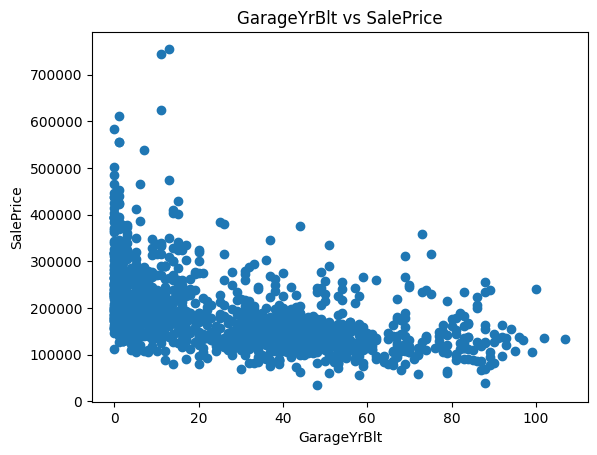

In [61]:
for features in year_feature:
    if features != 'YrSold':
        data = dataset.copy()
        data[features] = data['YrSold'] - data[features]
        plt.scatter(data[features],data['SalePrice'])
        plt.title(f'{features} vs SalePrice')
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

In [69]:
discrete_features = [
    features for features in dataset_with_numerical 
    if len(dataset[features].unique()) <= 25 and features not in year_feature + ['Id']
]
print("the len of the dicreate features is {} ".format(len(discrete_features)))


the len of the dicreate features is 17 


In [70]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

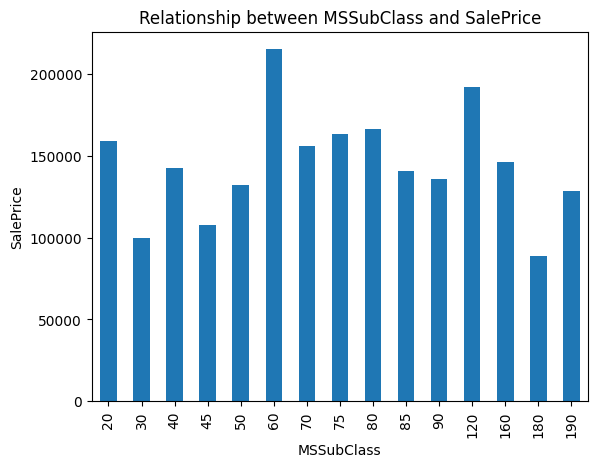

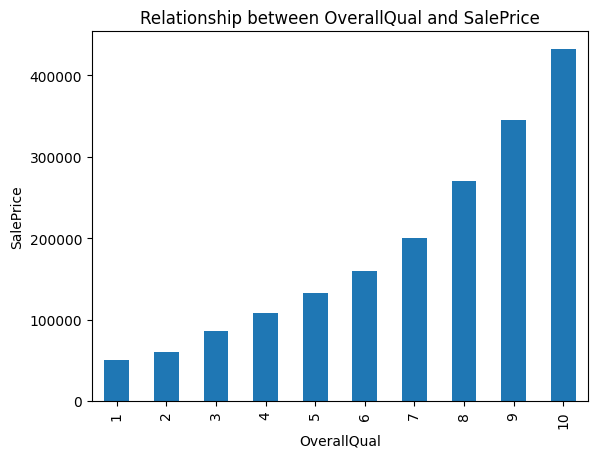

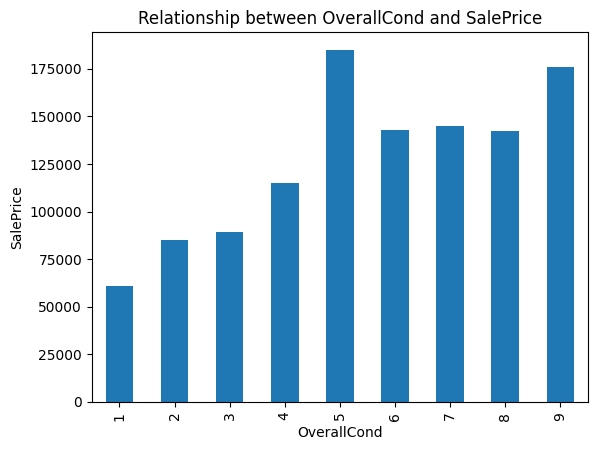

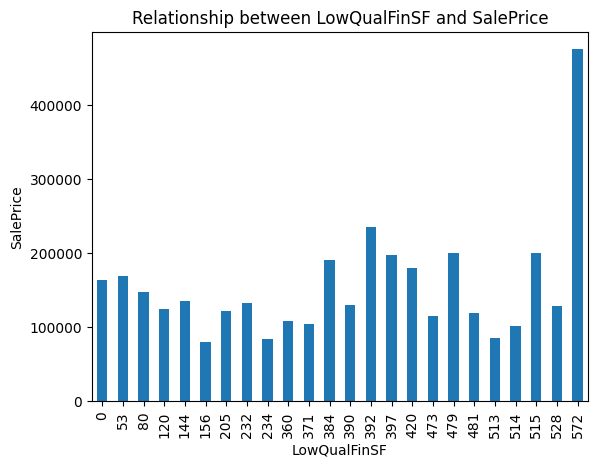

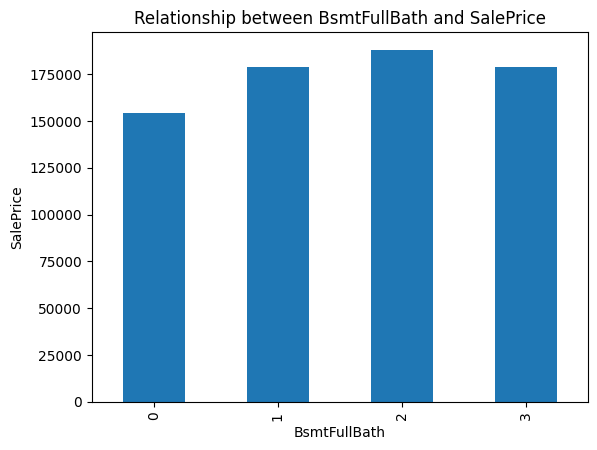

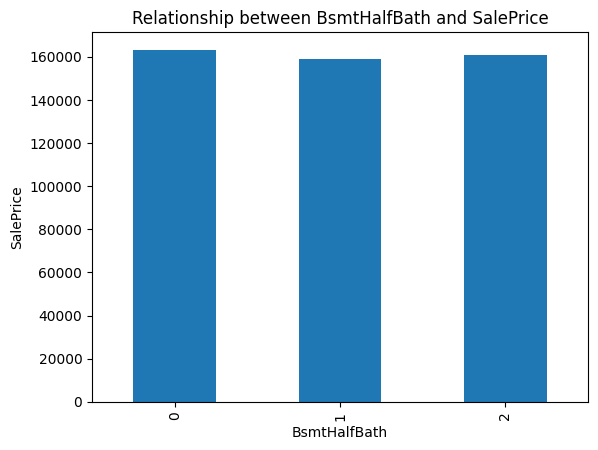

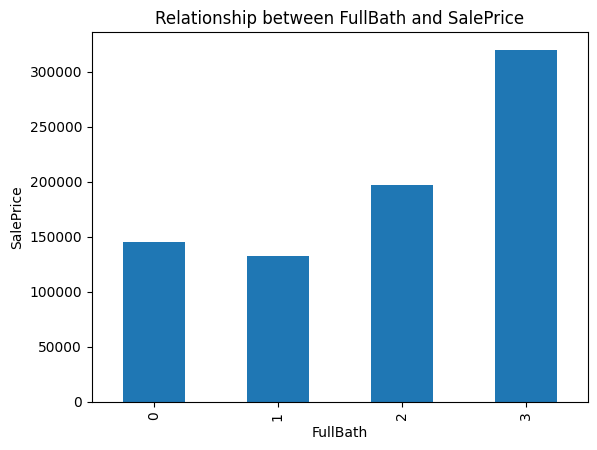

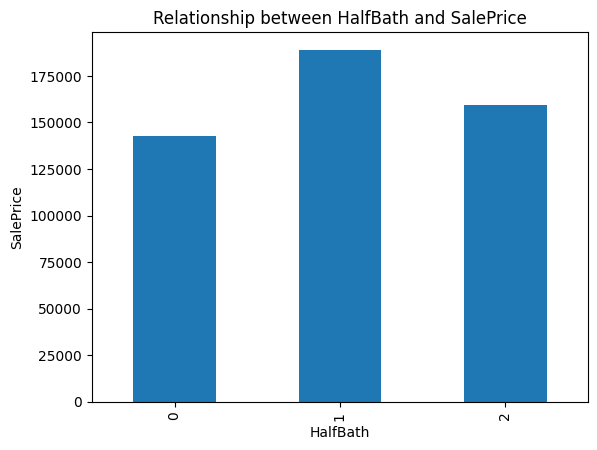

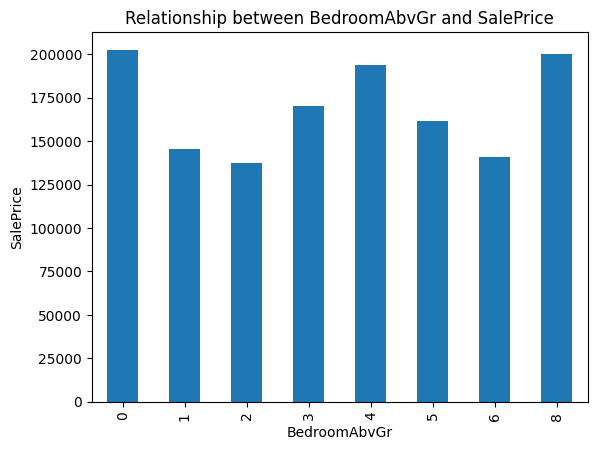

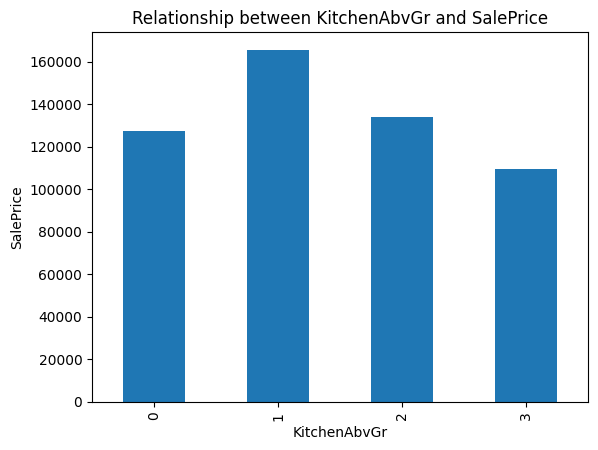

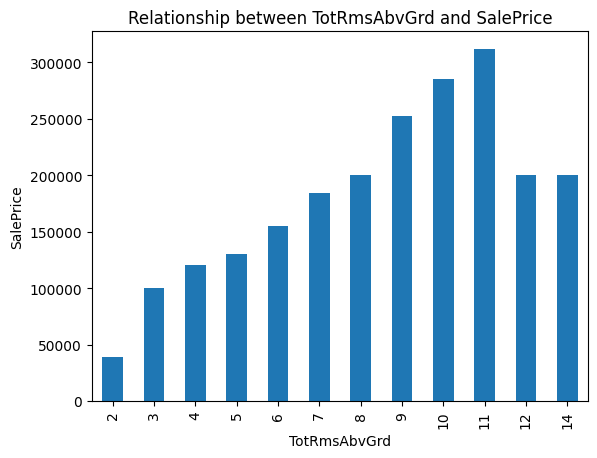

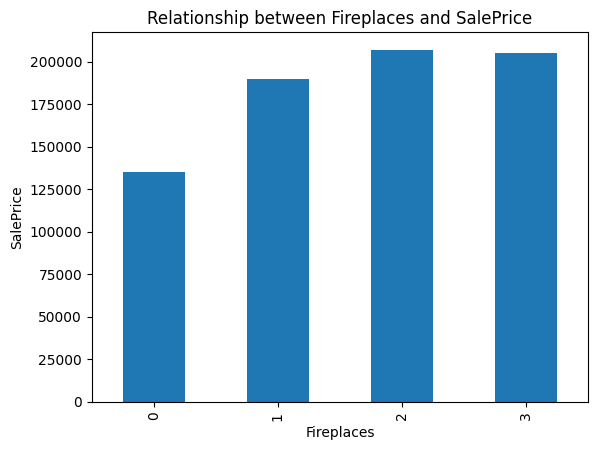

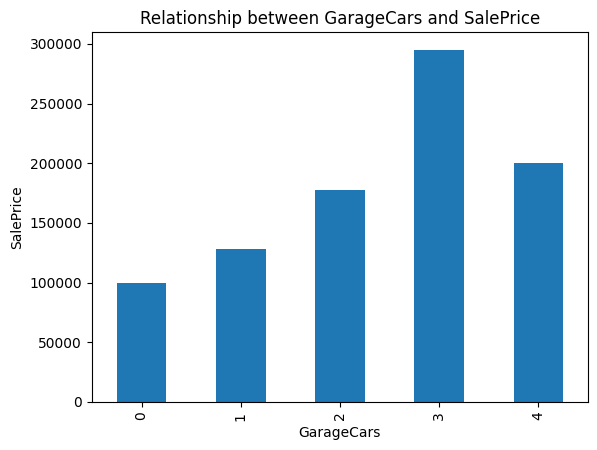

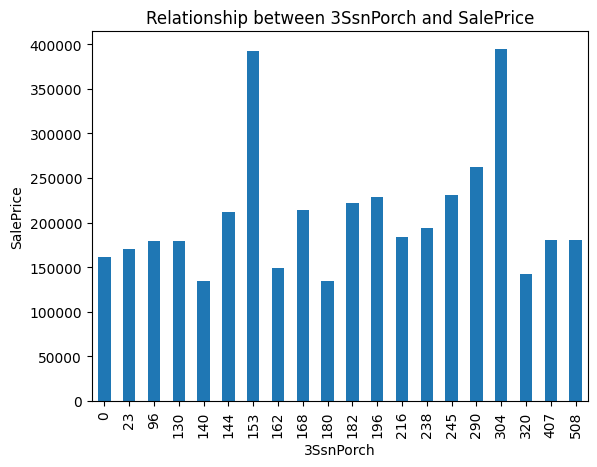

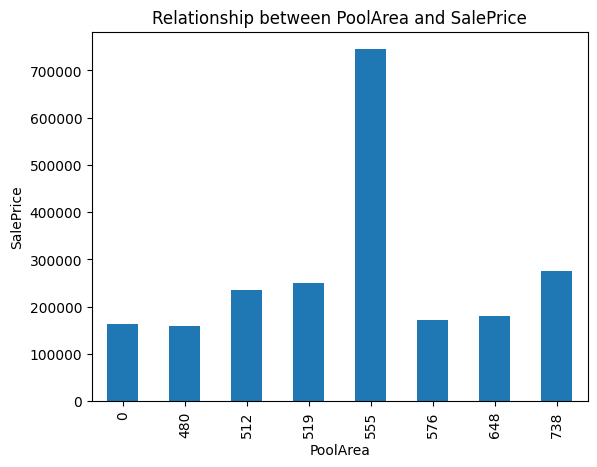

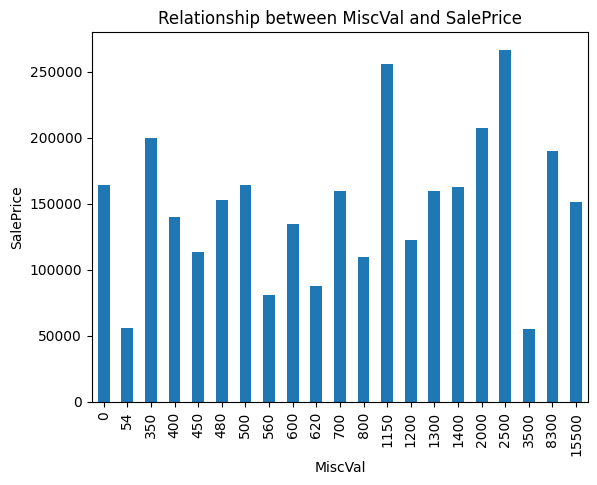

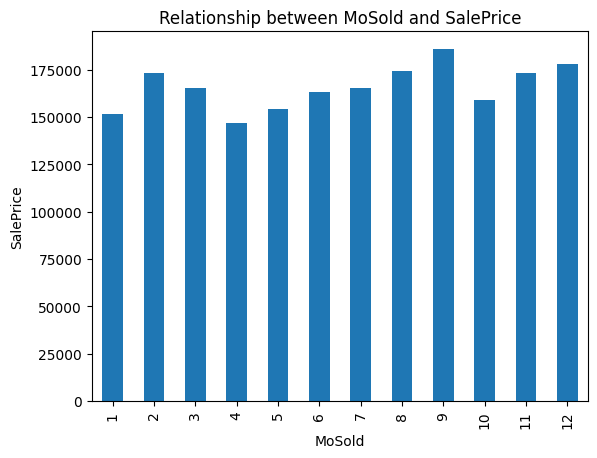

In [80]:
for features in discrete_features:
    data = dataset.copy()

    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(f'Relationship between {features} and SalePrice')
    plt.xlabel(features)
    plt.xticks(rotation = 90)
    plt.ylabel('SalePrice')
    plt.show()

In [86]:
continuous_features = [
    features for features in dataset_with_numerical 
    if features not in discrete_features + ['Id']
]
print('length of the features {}'.format(len(continuous_features)))


length of the features 20


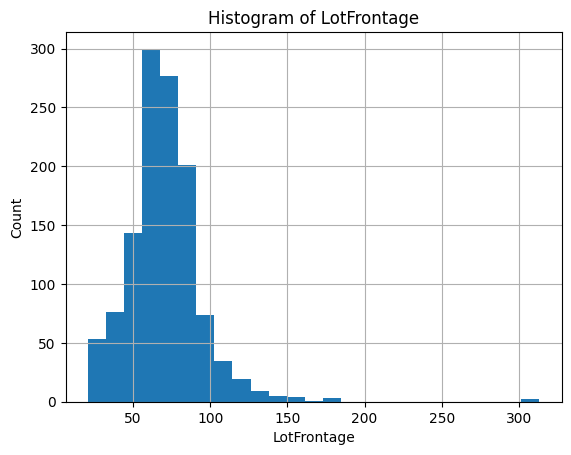

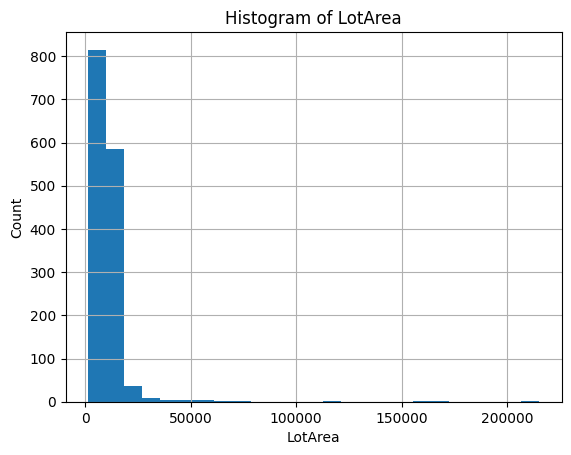

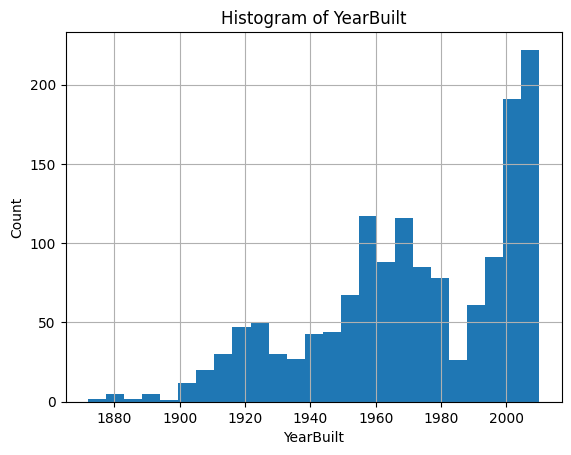

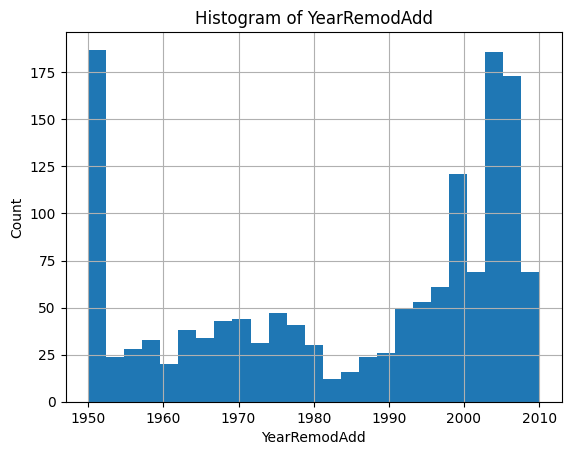

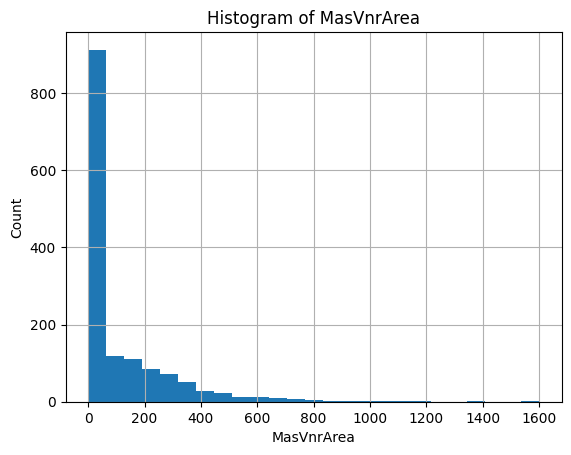

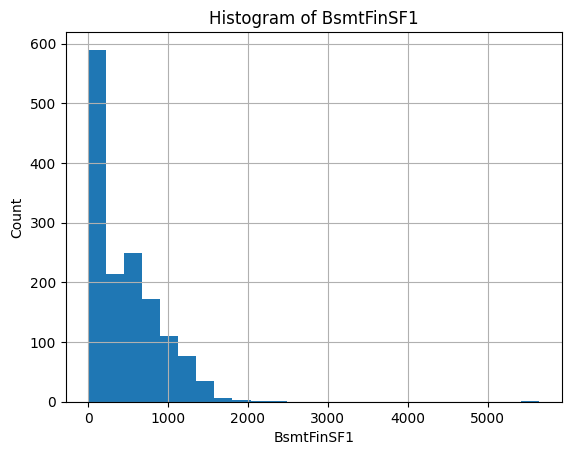

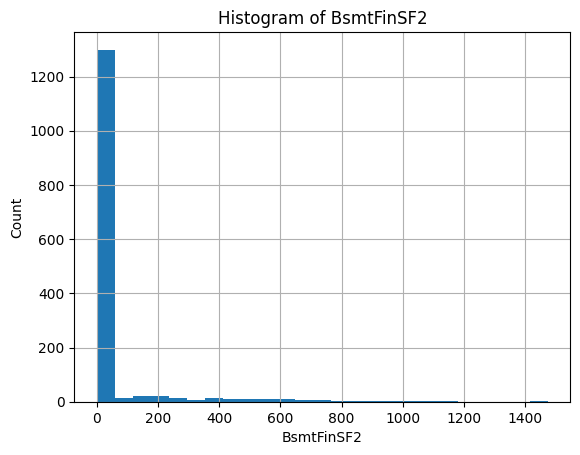

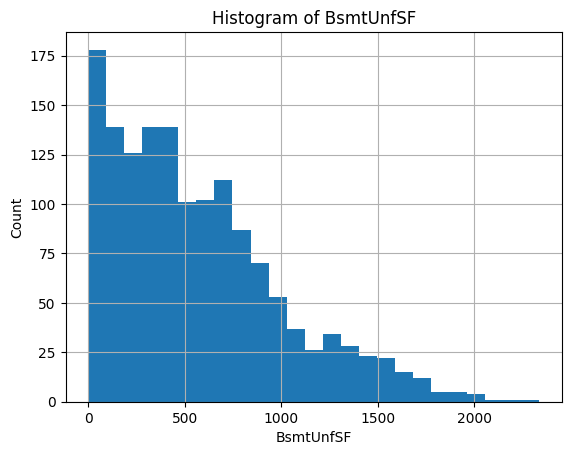

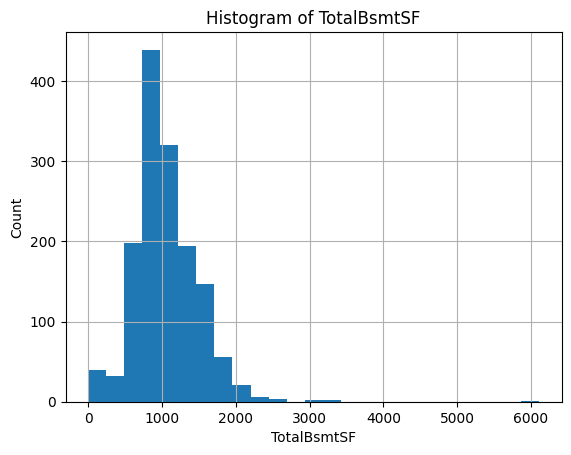

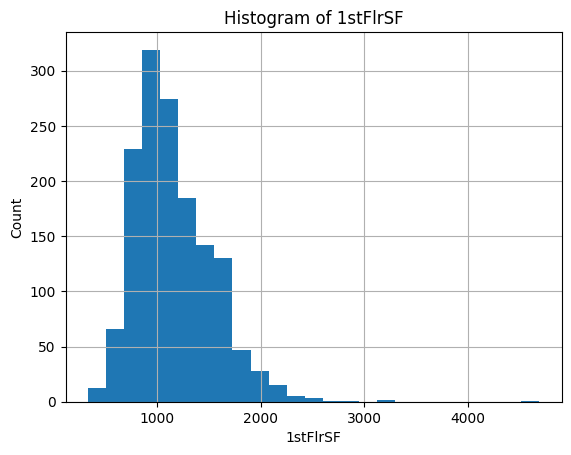

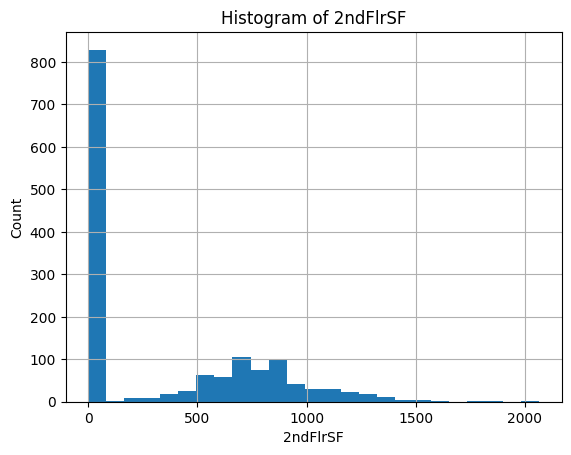

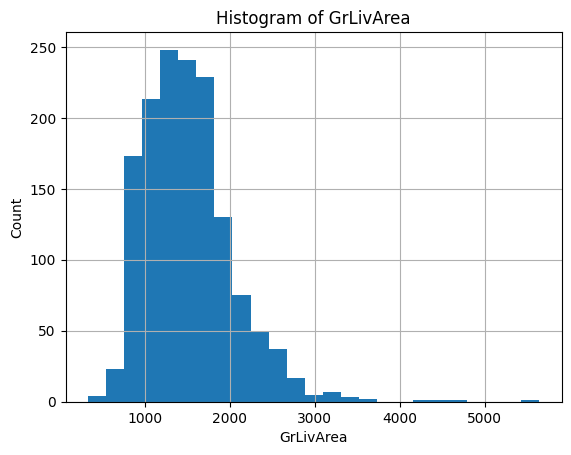

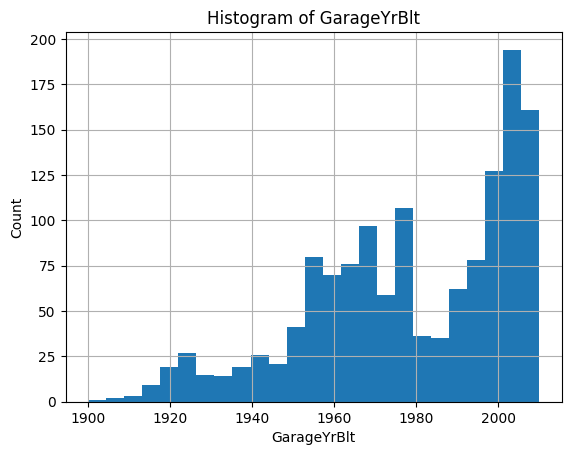

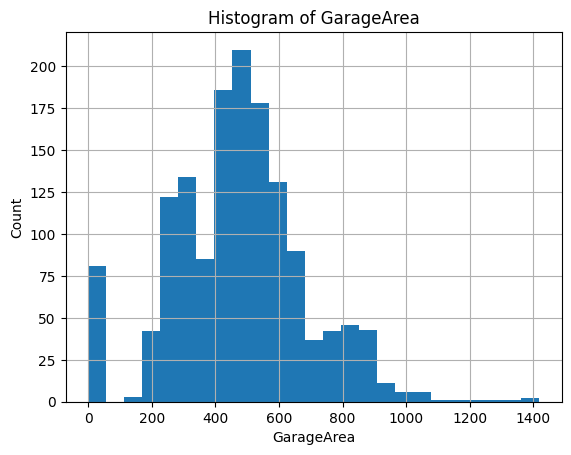

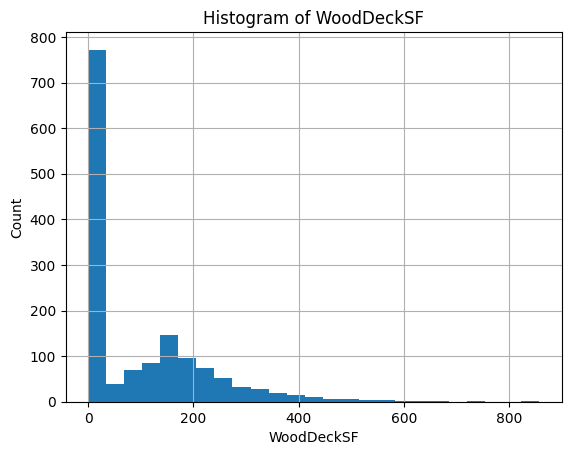

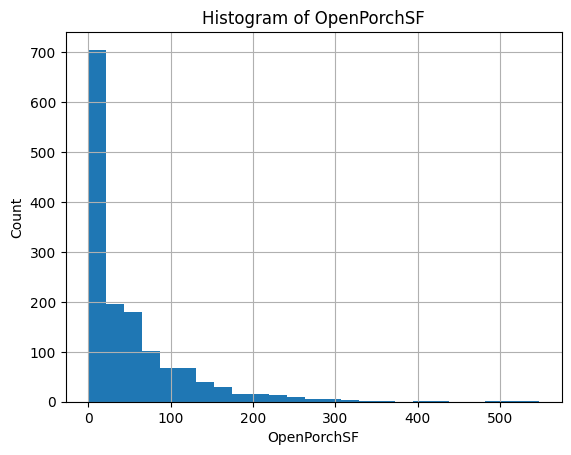

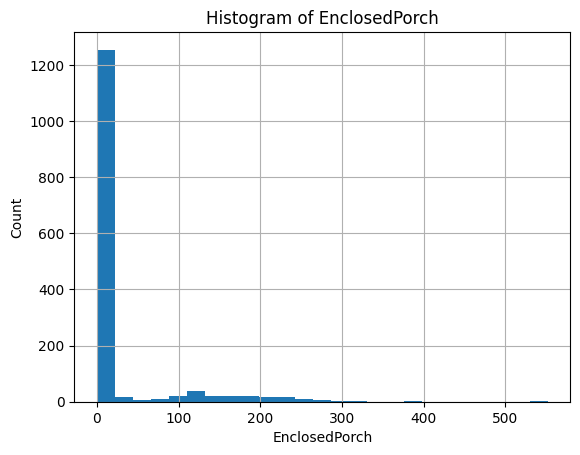

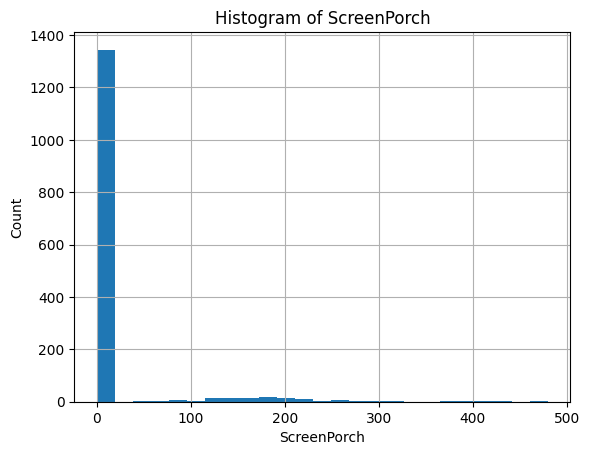

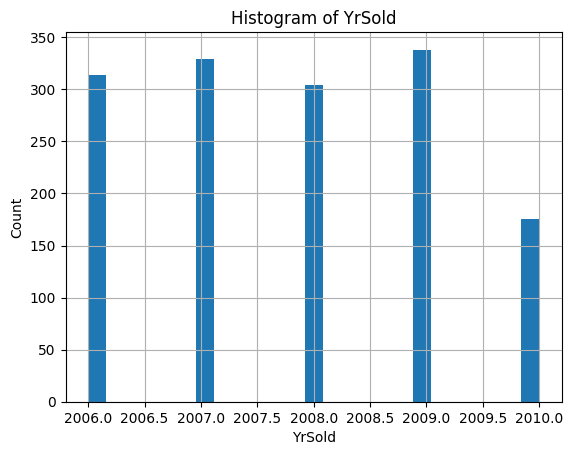

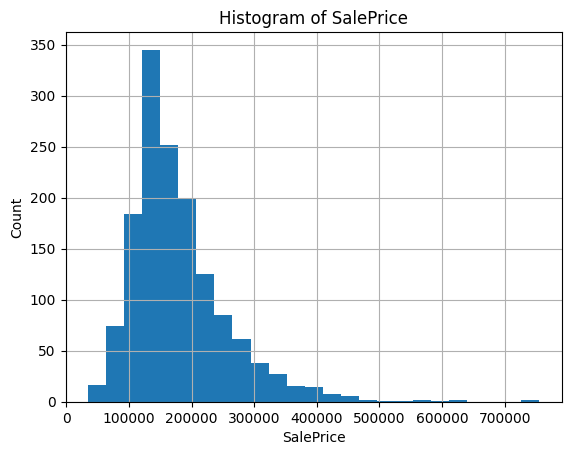

In [89]:
for features in continuous_features:
    data = dataset.copy()

    data[features].hist(bins = 25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title('Histogram of ' + features)
    plt.show()


In [ ]:
for features in continuous_features:
    data = dataset.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title('Logarithmic Transformation')
        plt.show()

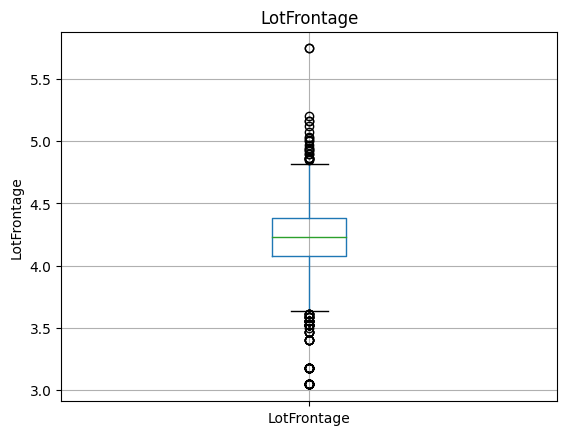

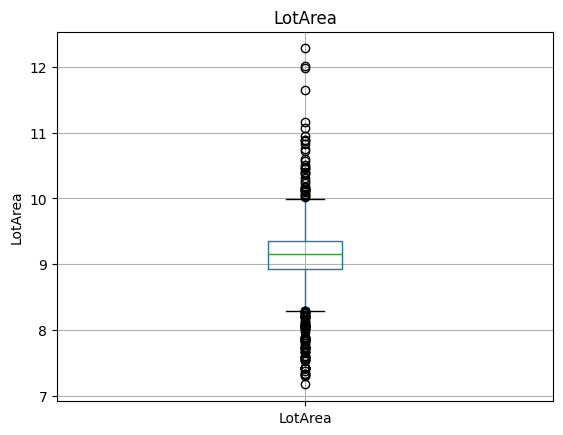

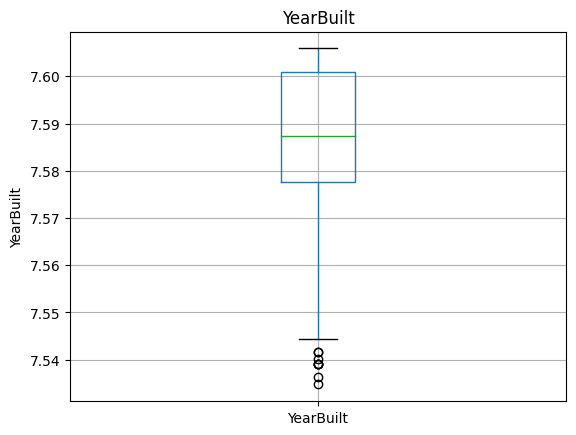

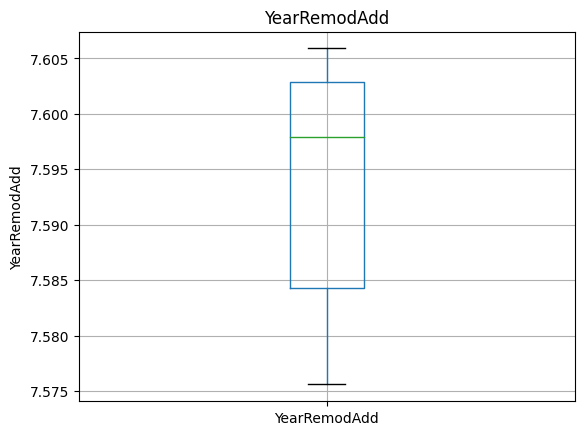

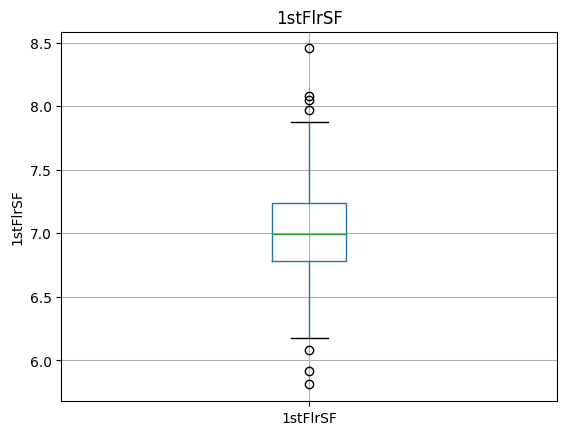

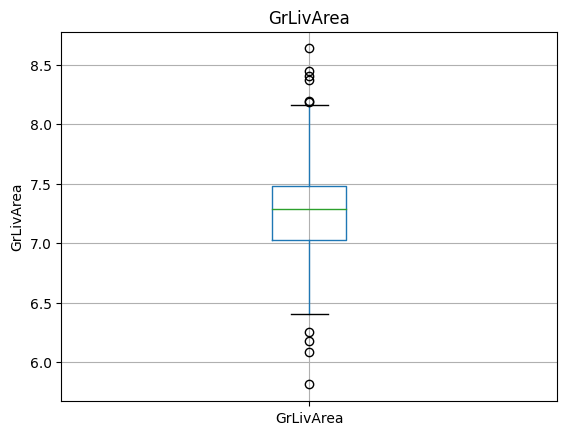

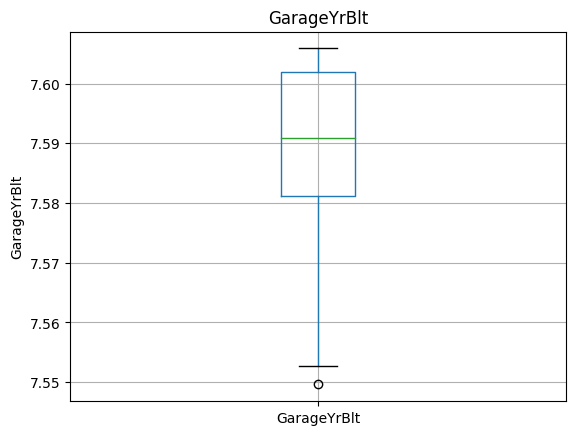

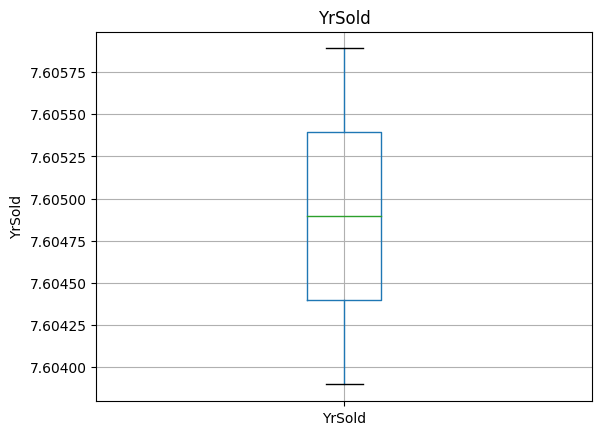

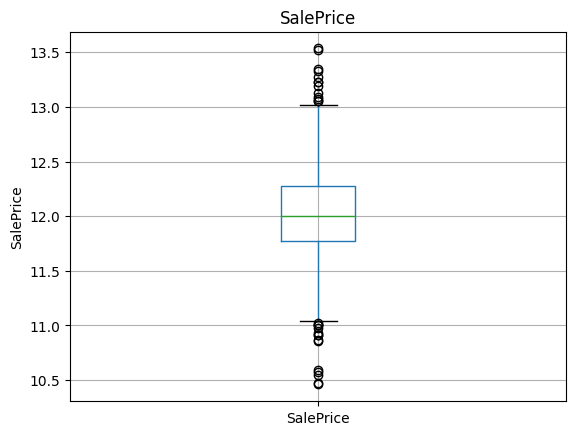

In [94]:
for features in continuous_features:
    data = dataset.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [96]:
categorical_features = [
    features for features in dataset.columns if dataset[features].dtype == 'O'
]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [98]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [99]:
for features in categorical_features:
    print('The features is {} and the number of unique category are {} ' .format(features , len(dataset[features].unique())))

The features is MSZoning and the number of unique category are 5 
The features is Street and the number of unique category are 2 
The features is Alley and the number of unique category are 3 
The features is LotShape and the number of unique category are 4 
The features is LandContour and the number of unique category are 4 
The features is Utilities and the number of unique category are 2 
The features is LotConfig and the number of unique category are 5 
The features is LandSlope and the number of unique category are 3 
The features is Neighborhood and the number of unique category are 25 
The features is Condition1 and the number of unique category are 9 
The features is Condition2 and the number of unique category are 8 
The features is BldgType and the number of unique category are 5 
The features is HouseStyle and the number of unique category are 8 
The features is RoofStyle and the number of unique category are 6 
The features is RoofMatl and the number of unique category are 

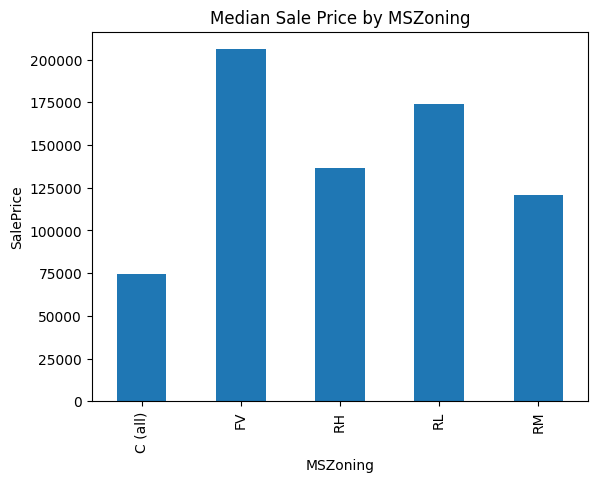

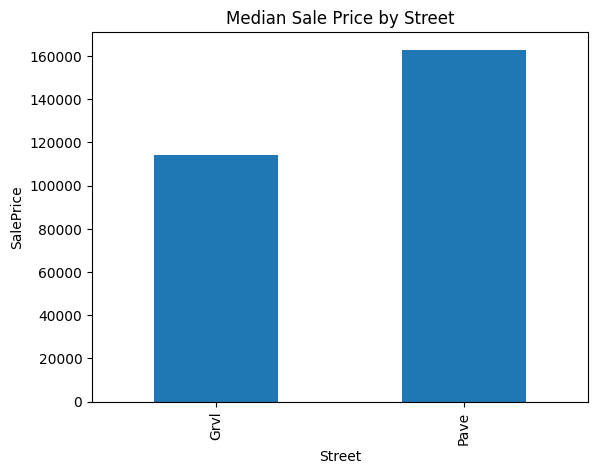

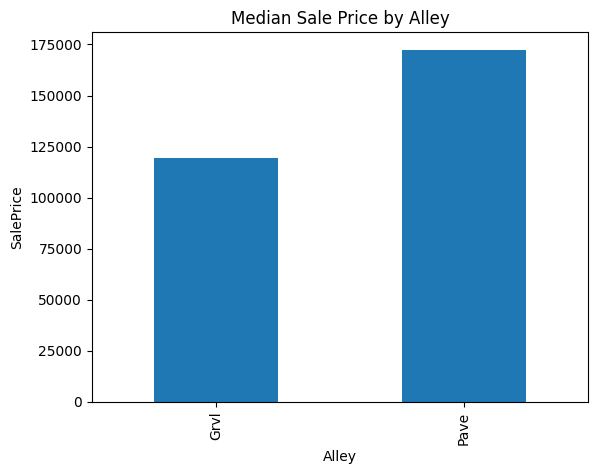

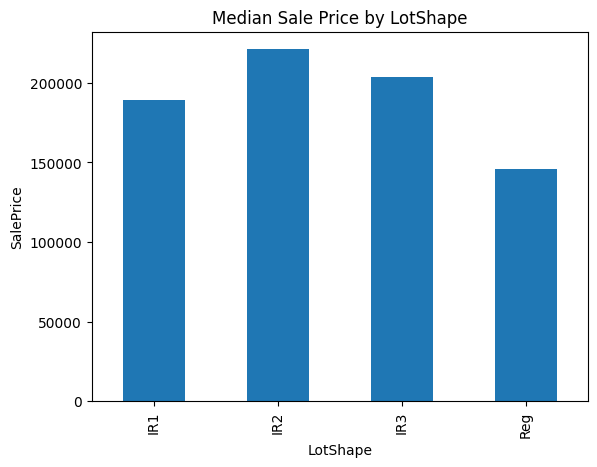

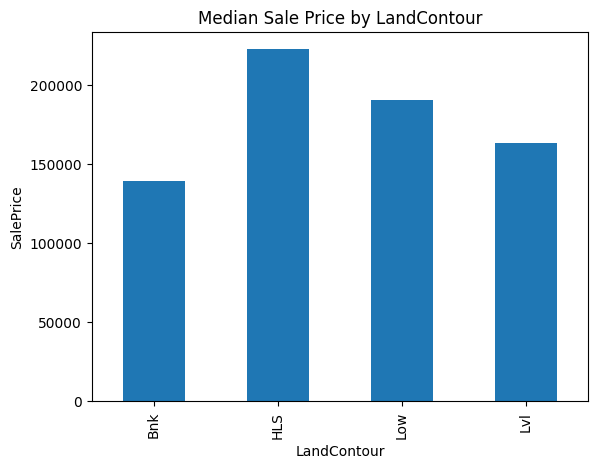

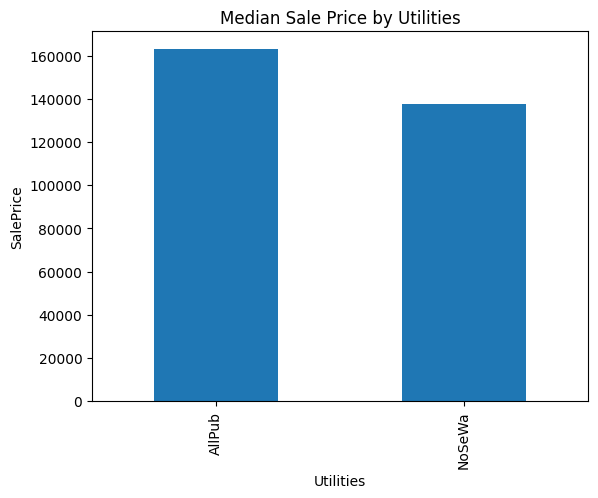

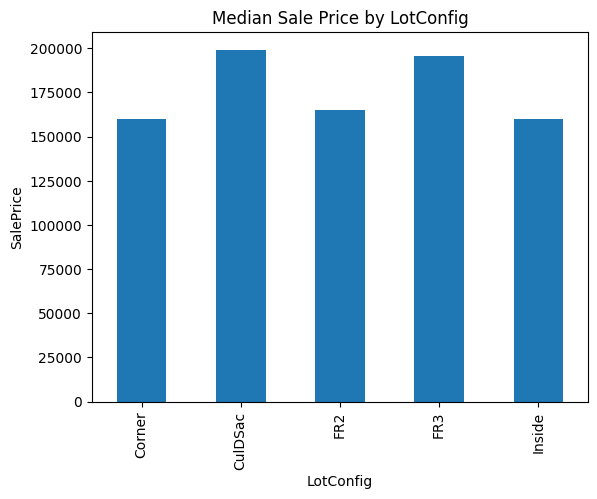

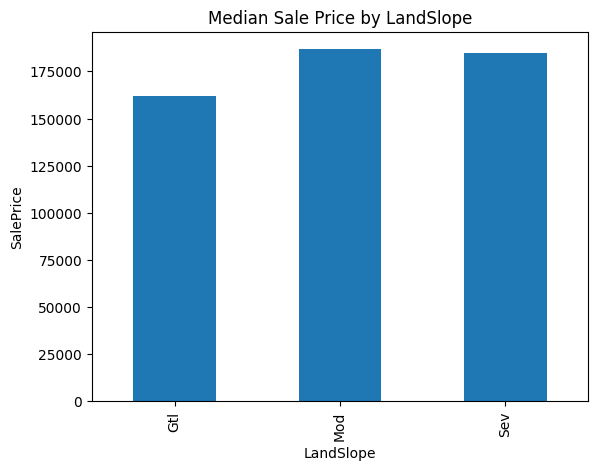

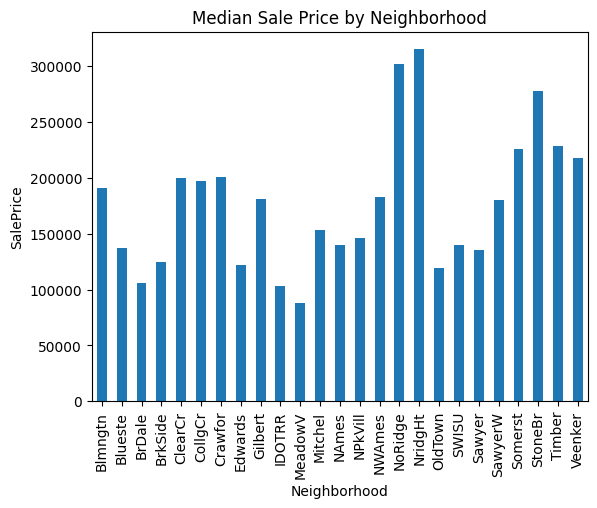

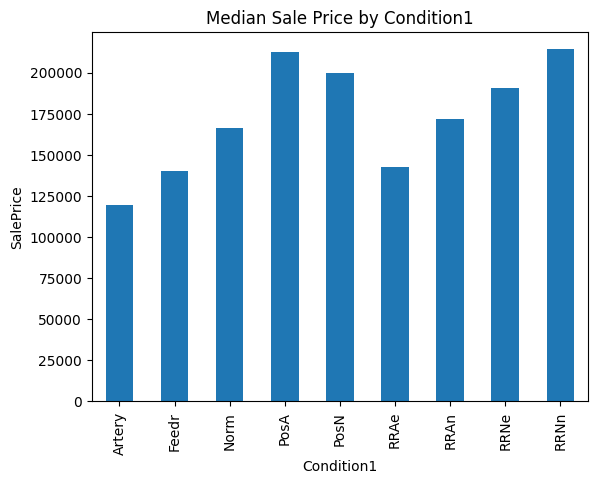

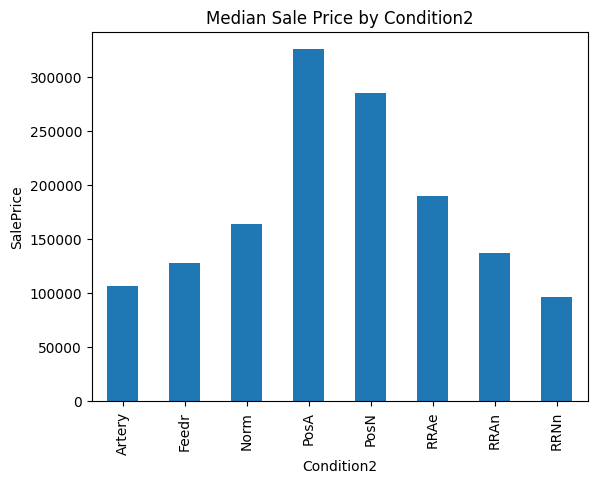

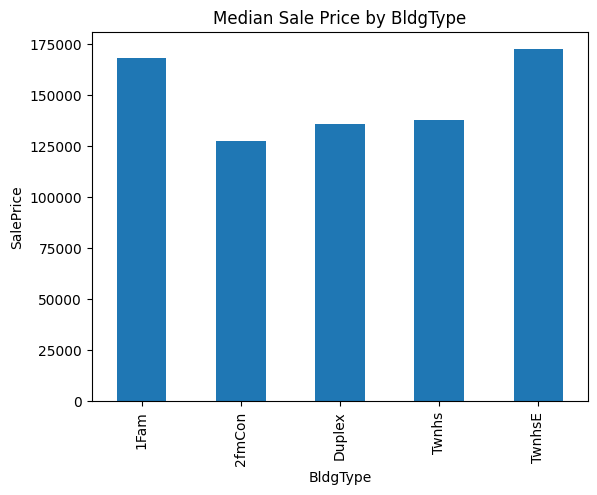

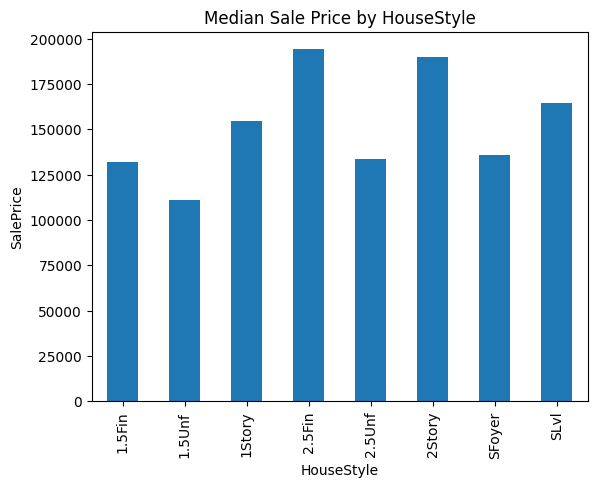

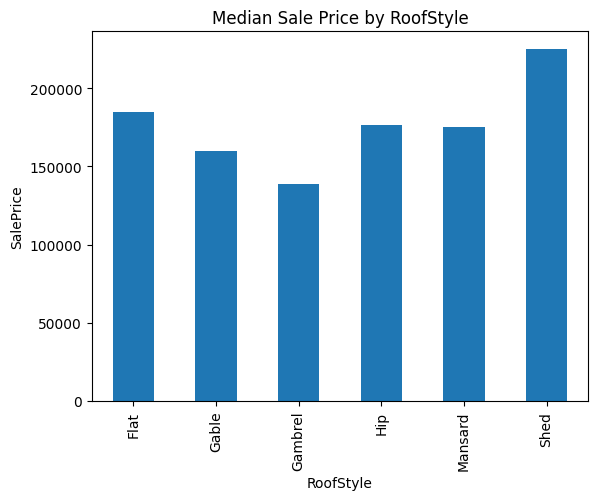

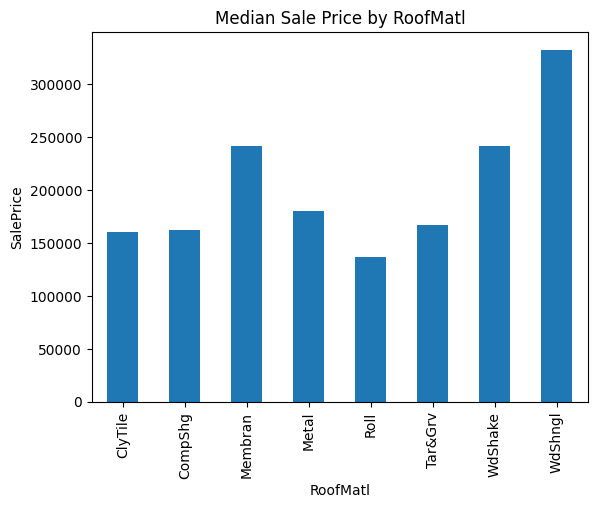

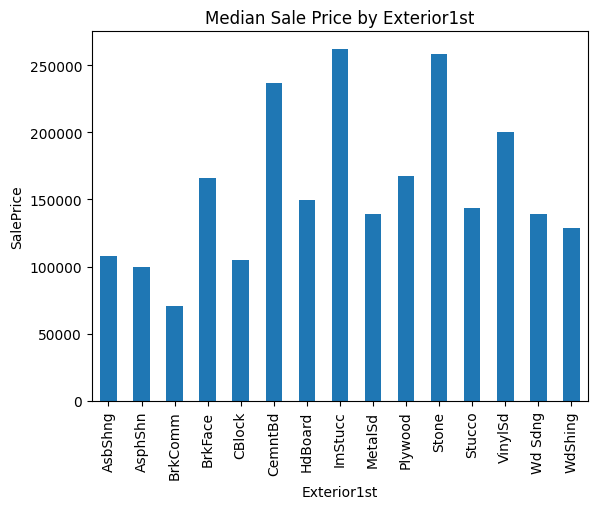

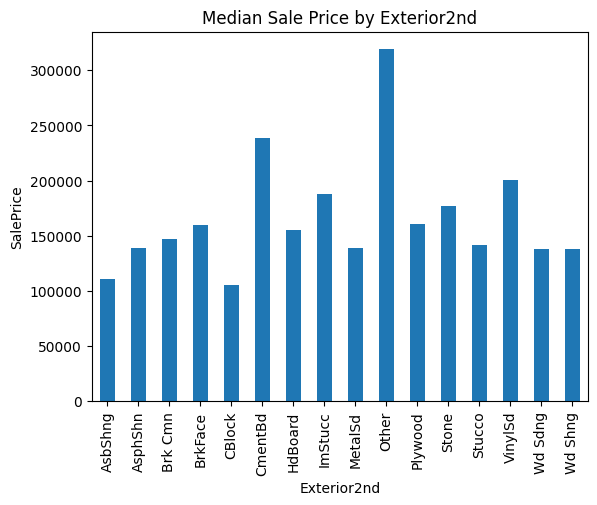

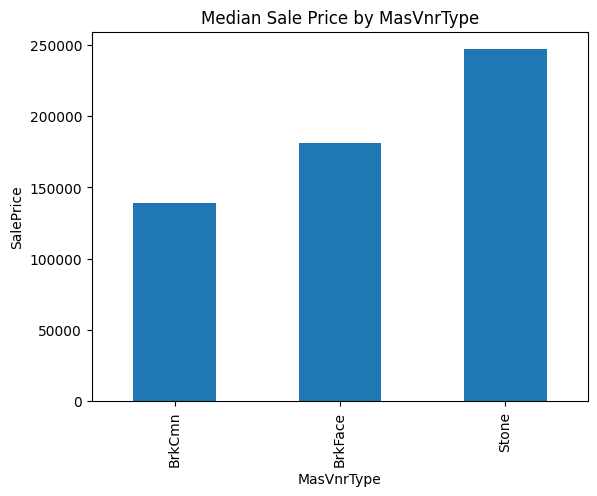

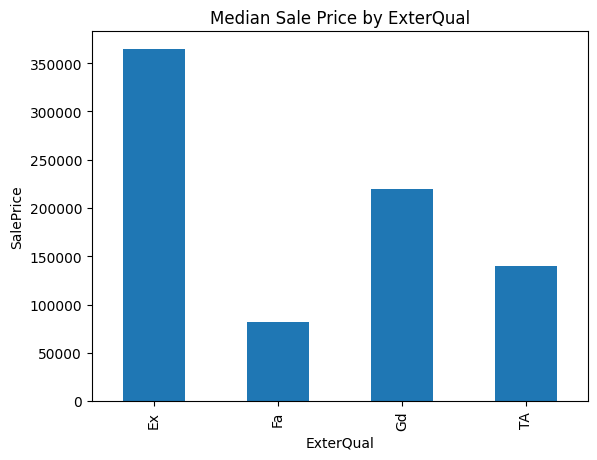

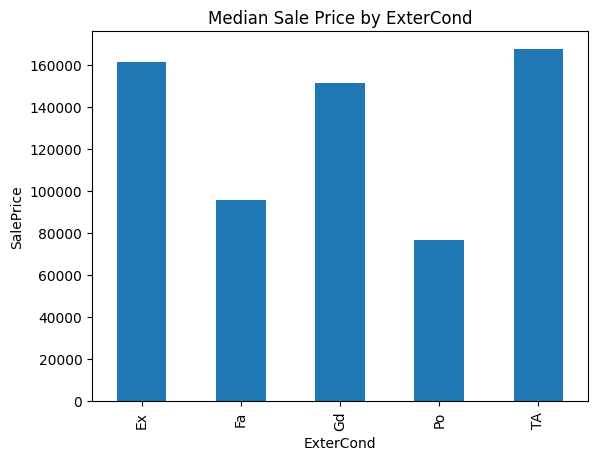

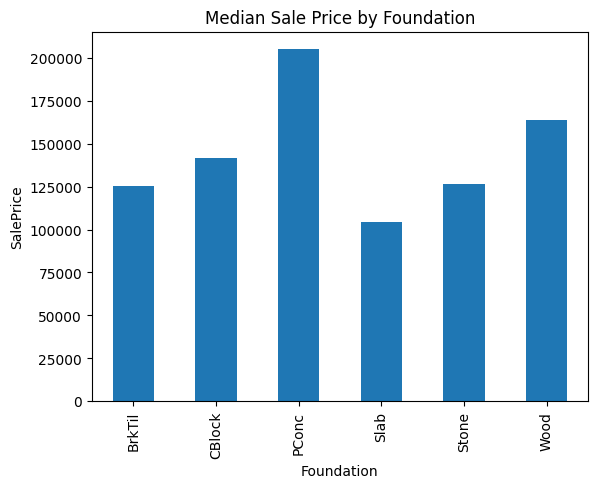

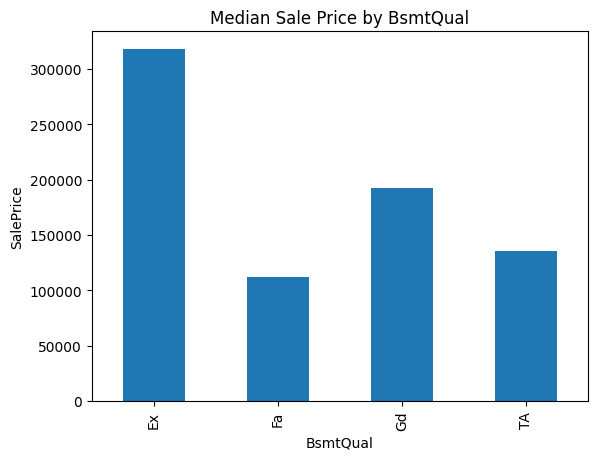

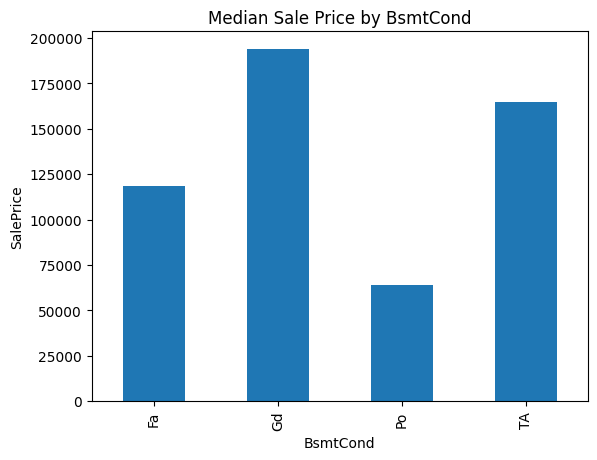

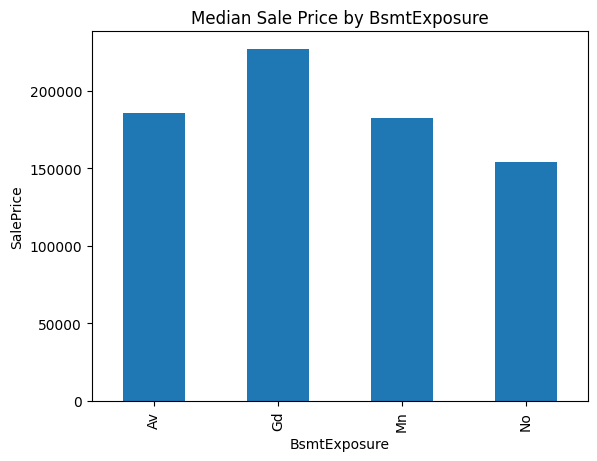

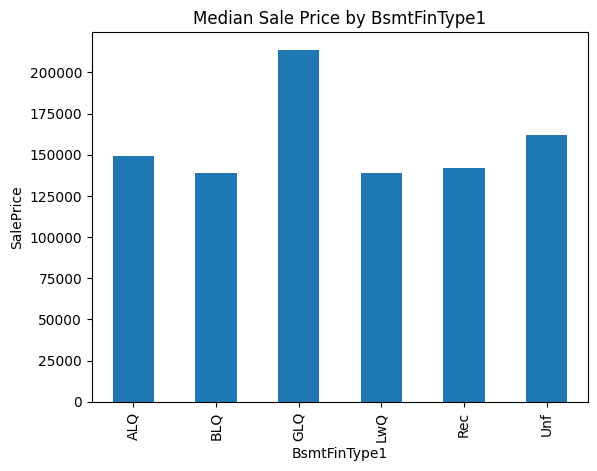

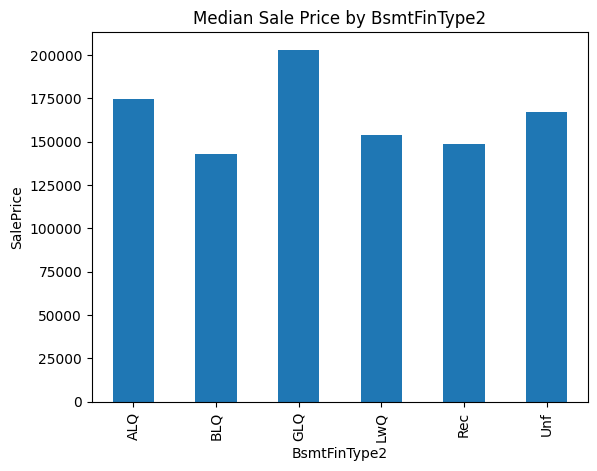

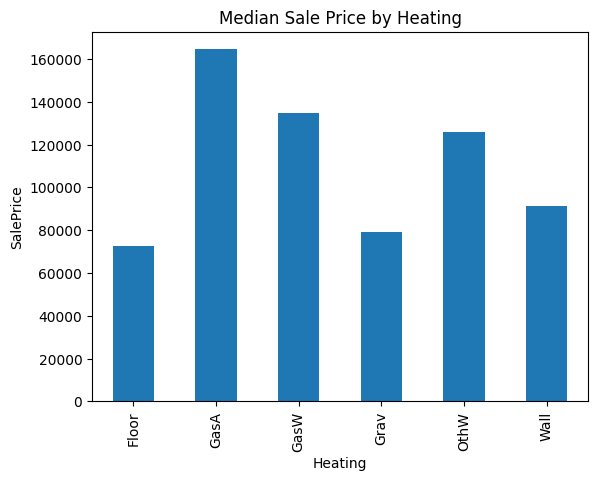

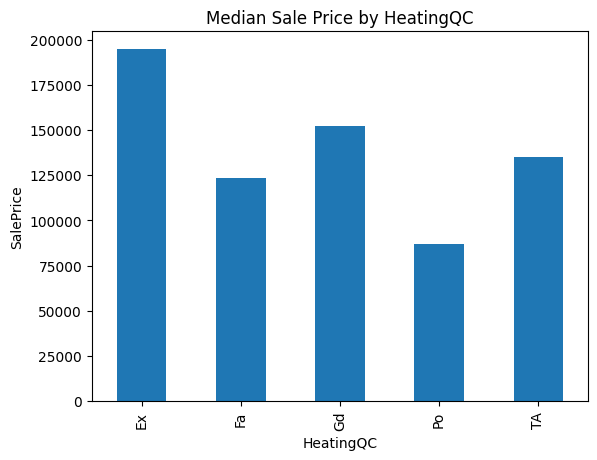

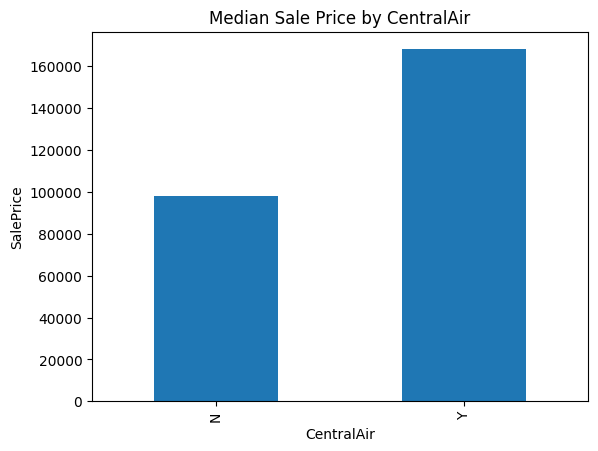

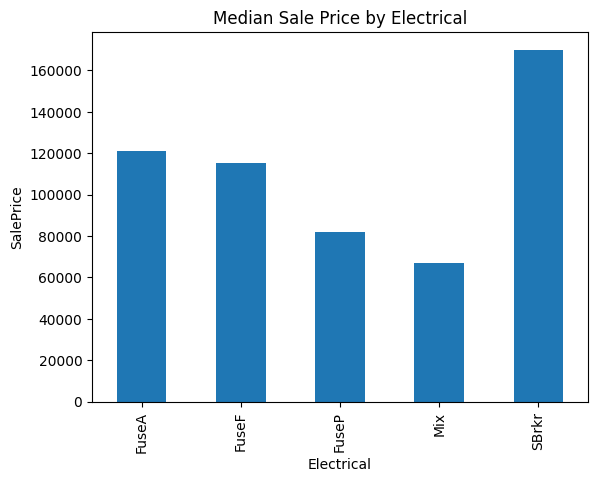

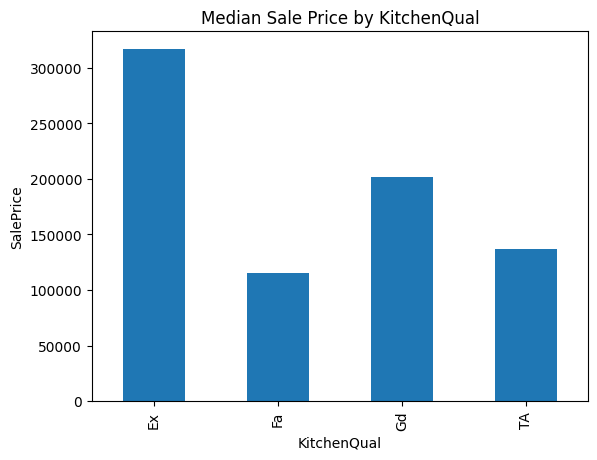

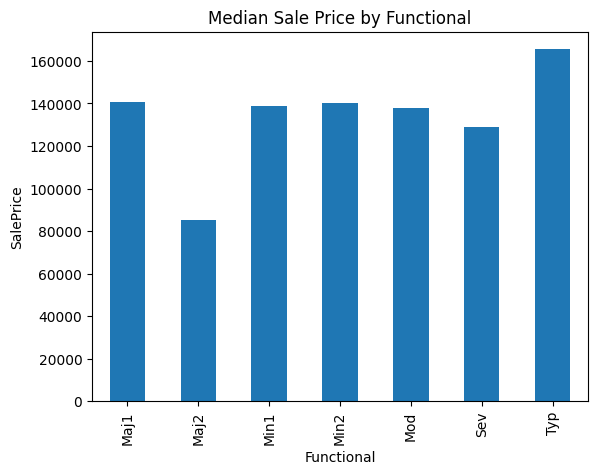

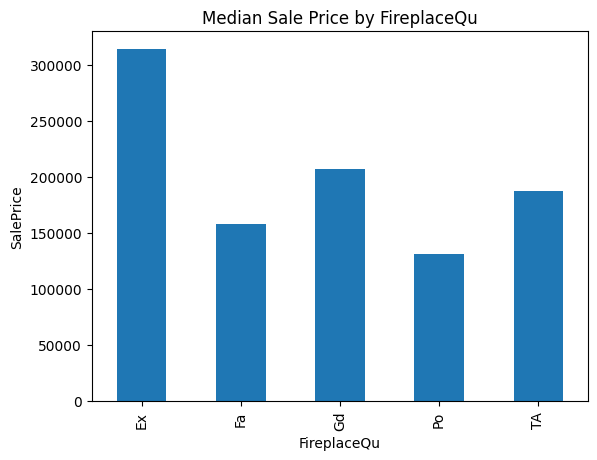

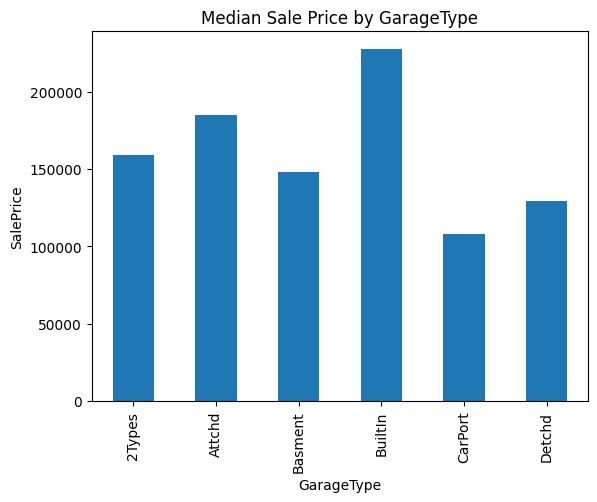

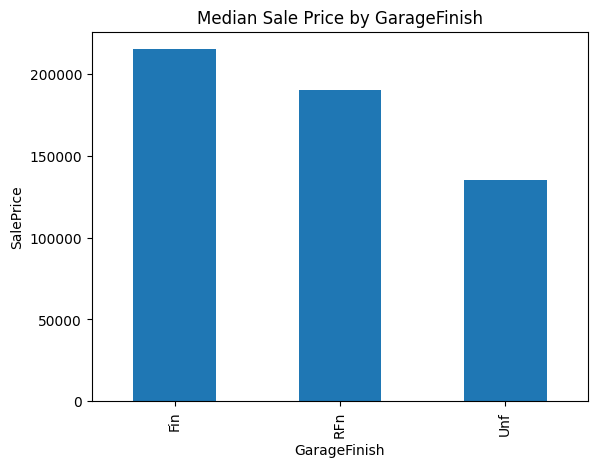

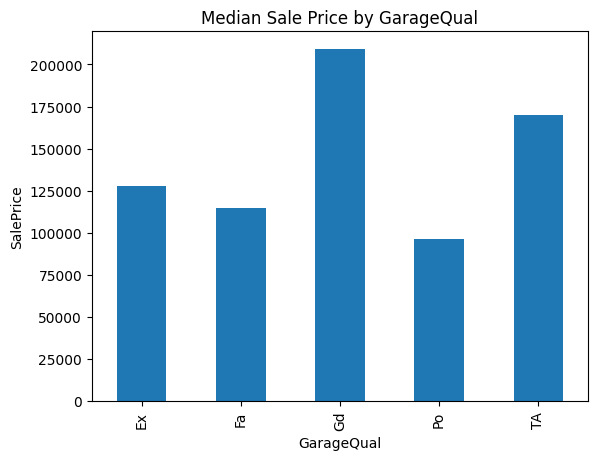

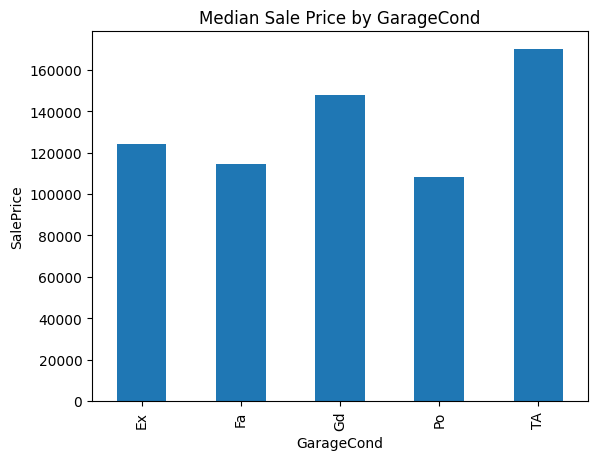

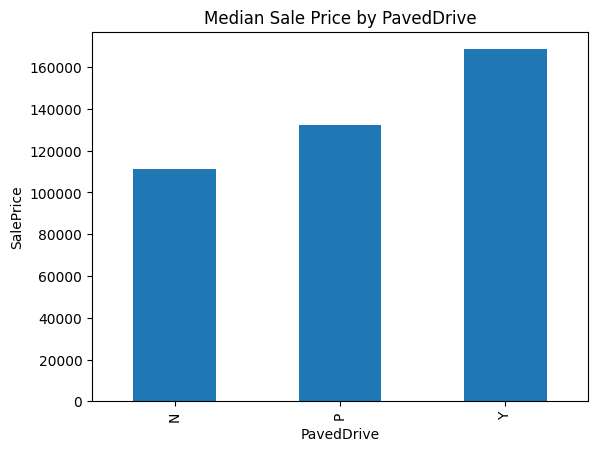

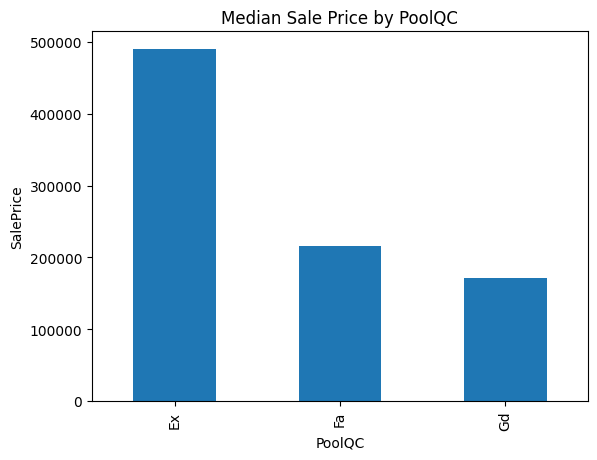

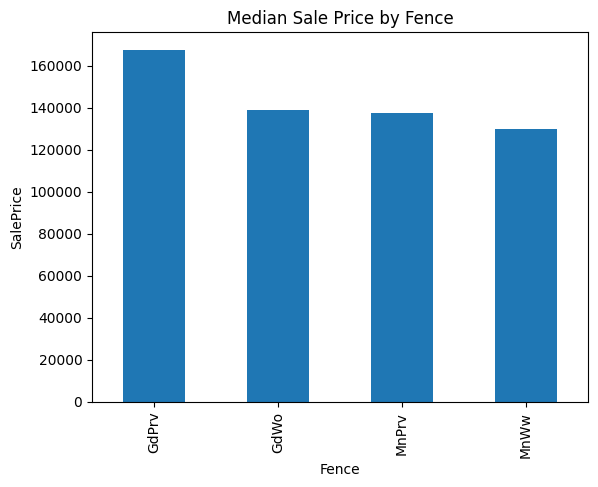

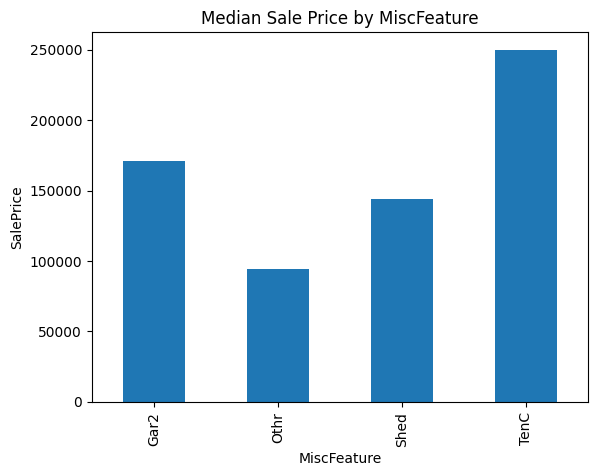

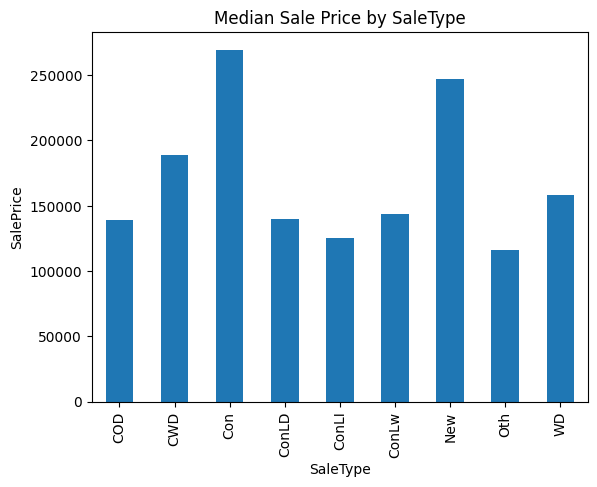

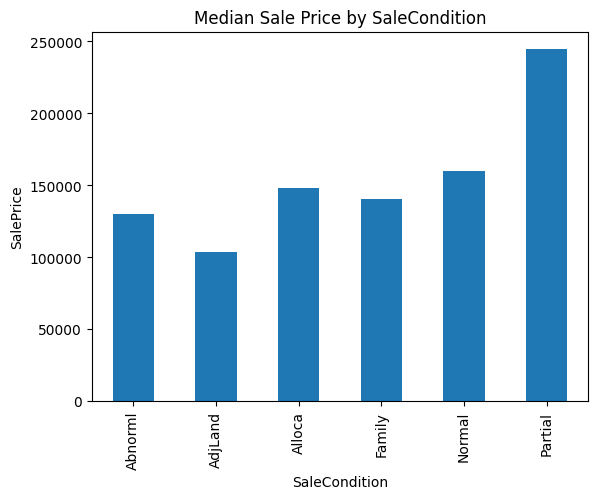

In [102]:
for features in categorical_features:
    data = dataset.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(f'Median Sale Price by {features}')
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()
